In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

make_regression function called to generate data

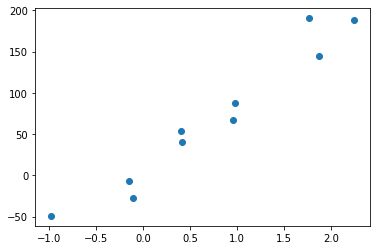

In [2]:
X, y = make_regression(n_samples=10, n_features=1, noise=20, random_state=0)
# plot regression dataset
plt.scatter(X,y)
plt.show()

In [3]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [4]:
m=X[:,0].size
X_train=np.append(np.ones((m,1)),X[:,0].reshape(m,1),axis=1)
y_train=y.reshape(m,1)

theta=np.zeros((2,1))

computeCost(X_train,y_train,theta)

5634.002874275218

In [5]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [6]:
theta,J_history = gradientDescent(X_train,y_train,theta,0.01,1500)
theta # weights

array([[ 8.96996374],
       [81.22424187]])

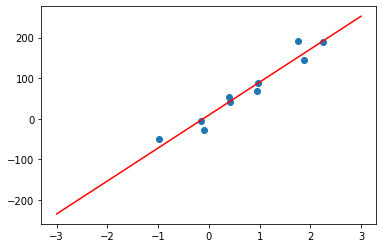

In [7]:
plt.scatter(X,y)
h_x = np.linspace(-3, 3, 100)
h_y = lambda x: theta[0,0] + theta[1][0]*x
plt.plot(h_x, h_y(h_x), c="r")

In [8]:
m=X[:,0].size
X_poly = pd.DataFrame(X)
X_poly[1] = pd.DataFrame(X)**2
X_poly[2] = pd.DataFrame(X)**3
X_poly[3] = pd.DataFrame(X)**4
X_poly.head()

,0,1,2,3
0,0.400157,0.160126,0.064075,0.025640
1,-0.103219,0.010654,-0.001100,0.000114
2,0.410599,0.168591,0.069223,0.028423
3,-0.977278,0.955072,-0.933371,0.912163
4,0.978738,0.957928,0.937561,0.917626


In [9]:
m,n = X_poly.shape
X_poly = np.array(X_poly)
X_train=np.append(np.ones((m,1)),X_poly.reshape(m,n),axis=1)
y_train=y.reshape(m,1)

theta = np.zeros((n+1,1))

theta,J_history = gradientDescent(X_train,y_train,theta,0.01,1500)

theta

array([[  5.29342992],
       [ 50.15693985],
       [ 19.70571714],
       [ 19.6370169 ],
       [-10.04391933]])

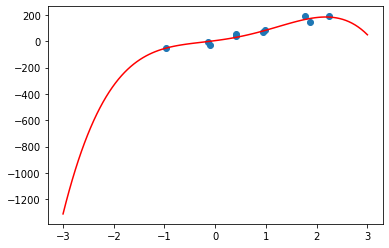

In [10]:
plt.scatter(X,y)
h_x = np.linspace(-3, 3, 100)
h_y = lambda x: theta[0,0] + theta[1][0]*x + theta[2][0]*x*x + theta[3][0]*(x**3) + theta[4][0]*(x**4)
plt.plot(h_x, h_y(h_x), c="r")

In [11]:
m=X[:,0].size
a = 10
X_poly = pd.DataFrame(X)
X_poly[1] = np.sin(pd.DataFrame(X) - a)
X_poly.head()

,0,1
0,0.400157,0.174172
1,-0.103219,0.627580
2,0.410599,0.163881
3,-0.977278,0.999833
4,0.978738,-0.392654


In [12]:
m,n = X_poly.shape
X_poly = np.array(X_poly)
X_train=np.append(np.ones((m,1)),X_poly.reshape(m,n),axis=1)
y_train=y.reshape(m,1)

theta = np.zeros((n+1,1))

theta,J_history = gradientDescent(X_train,y_train,theta,0.01,1500)

theta

array([[ 23.56310361],
       [ 56.52151002],
       [-35.02194777]])

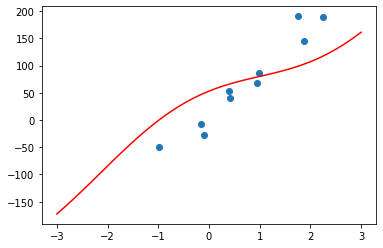

In [13]:
plt.scatter(X,y)
h_x = np.linspace(-3, 3, 100)
h_y = lambda x: theta[0,0] + theta[1][0]*x + theta[2][0]*np.sin(x-1)
plt.plot(h_x, h_y(h_x), c="r")